In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fitting of Periodic Data

a) Create function that simulates data that takes a periodic function of the form:

v = a0 + (a1)(t) + a2 sin(a4 t) + a3 cos(a4 t)

Simulate the data at a number of random times over an interval and include Gaussian errors for the data. The inputs, aj, should take the form of a 1D python array.

b) Setting a0=0, a1=1, a3=1, and a4=0, simulate a dataset from t=20 to t=35, containing 100 points with Gaussian errors with uncertainty equal to 0.5.

c) Fit the data with a function of the same form as above. Do the fit parameters agree, within error, with the expected values?

d) Now, define a new fitting function for the same data as:

v = a0 + (a1)(t) + a2sin(a3*t + a4)

and refit the data and extract the fit parameters with errors. Does this give a better or worse fit?

e) Show that the two fits are mathematically equivalent, and then from this, calculate the mathematical relationship between the fit parameters and errors of the two fit functions.

In [2]:
def periodic_function(coefficients, time_val):
    """
    This function computes the value, v, for the periodic function:
    
    v = a0 + a1*t + a2*sin(a4*t) + a3*cos(a4*t)
    
    for given values of a0, a1, etc. and a given time value.
    
    :param coefficients: numpy array with the five coefficient values
    :param time_val: a float representing a single time value
    :return: the value of v as a single float
    """
    
    a0 = coefficients[0]
    a1 = coefficients[1]
    a2 = coefficients[2]
    a3 = coefficients[3]
    a4 = coefficients[4]
    
    return (a0 + (a1*time_val) + (a2*np.sin(a4*time_val)) + (a3*np.cos(a4*time_val)))

def simulate_periodic_function(coeff, num_times, time_interval, sigma):
    """
    This function generates data for a given number of time values in a given time interval.
    Gaussian noise with a given uncertainty, sigma, is added to the data, and two numpy arrays
    with the chosen times and output values are returned.
    
    :param coeff: numpy array with five coefficient values for the periodic function
    :param num_times: how many data points are generated
    :param time_interval: a list of two values indicating the interval the time values will be generated from
    :param sigma: the uncertainty of the Gaussian noise
    :return: two numpy arrays with the input and output data
    """

    time_list = []
    output_list = []
    mu = (time_interval[1] - time_interval[0]) / 2.0
    
    for i in range(num_times):
        time_value = np.random.uniform(time_interval[0], time_interval[1])
        time_list.append(time_value)
        gauss_error = np.random.normal(mu, sigma)
        output_value = periodic_function(coeff, time_value) + gauss_error
        output_list.append(output_value)
    
    return np.array(time_list), np.array(output_list)

def graph_simulation_data(time_array, v_array):
    """
    This function plots a graph of the data it's given.
    
    :param time_array: the independent variable
    :param v_array: the dependent variable
    :return: plot of the given data
    """
    
    plt.plot(time_array, v_array, ".")
    plt.show()

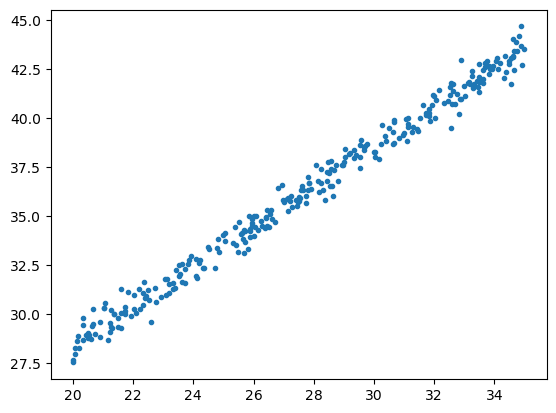

In [3]:
# a_vals = np.array([1, 2, 3, 4, np.pi/2])
a_vals = np.array([0, 1, 1, 1, 0])
# time_interval = [0, 20]
time_interval = [20, 35]

sigma = 0.5
num_points = 300

x, y = simulate_periodic_function(a_vals, num_points, time_interval, sigma)
graph_simulation_data(x, y)

In [4]:
def fit_function_one(t, a_0, a_1, a_2, a_3, a_4):
    return a_0 + (a_1*t) + (a_2*np.sin(a_4*t)) + (a_3*np.cos(a_4*t))

def fit_function_two(t, a_0, a_1, a_2, a_3, a_4):
    return a_0 + (a_1*t) + (a_2*np.sin(a_3*t + a_4))

In [5]:
# curve fit function sets initial parameter values to 1 if they are not given
init_params = [0, 1, 1, 1, 0]
popt, pcov = curve_fit(fit_function_one, x, y, p0=init_params)

# optimal values for parameters
# print(popt)
# covariance matrix for popt
# print(pcov)

print()

# get the uncertainties for the fit parameters
perr = np.sqrt(np.diag(pcov))
aa0 = popt[0]
aa1 = popt[1]
aa2 = popt[2]
aa3 = popt[3]
aa4 = popt[4]
daa0 = perr[0]
daa1 = perr[1]
daa2 = perr[2]
daa3 = perr[3]
daa4 = perr[4]

print("a0: {0:.4f} +/- {0:.4f}".format(aa0, daa0))
print("a1: {0:.4f} +/- {0:.4f}".format(aa1, daa1))
print("a2: {0:.4f} +/- {0:.4f}".format(aa2, daa2))
print("a3: {0:.4f} +/- {0:.4f}".format(aa3, daa3))
print("a4: {0:.4f} +/- {0:.4f}".format(aa4, daa4))


a0: 4.0324 +/- 4.0324
a1: 1.0294 +/- 1.0294
a2: -0.0018 +/- -0.0018
a3: 3.9174 +/- 3.9174
a4: -0.0127 +/- -0.0127


In [6]:
# curve fit function sets initial parameter values to 1 if they are not given
popt, pcov = curve_fit(fit_function_two, x, y)

# optimal values for parameters
print(popt)
# covariance matrix for popt
print(pcov)

[ 8.06223448  1.0165467  -0.07618706  0.79937145  7.09749692]
[[ 4.20263704e-02 -1.49693250e-03  3.05695909e-03  1.87951166e-03
  -1.52072119e-02]
 [-1.49693250e-03  5.45537169e-05 -1.11253275e-04 -1.16404866e-04
   1.85762381e-03]
 [ 3.05695909e-03 -1.11253275e-04  1.93456562e-03  2.01766808e-04
  -4.26792994e-03]
 [ 1.87951166e-03 -1.16404866e-04  2.01766808e-04  1.68657041e-02
  -4.73268421e-01]
 [-1.52072119e-02  1.85762381e-03 -4.26792994e-03 -4.73268421e-01
   1.36073656e+01]]
